In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [251]:
df = pd.read_csv("./oh_ds_challenge.csv")

In [252]:
df.describe()

,id,program_week,group_id,initial_weight,age,bmi,personality_extraverted,personality_conventional,readiness_change_food,readiness_change_phys,n_weigh_ins,n_lessons,n_private_messages,n_group_messages,n_group_comments,n_log_ins,n_meals_tracked,n_activities_tracked,weekly_weight_lost,week16_loss
count,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,20950.000000,20432.000000
mean,746.590523,8.188368,48.933381,211.318014,48.581703,33.942638,0.740342,-2.529122,8.388225,8.279943,5.162108,0.754777,0.436748,0.178604,1.403417,4.714923,2.196701,2.893948,0.029988,0.044481
std,434.714219,4.586220,29.530509,46.628381,12.053764,6.648276,3.107219,2.233331,1.653291,1.770511,3.256985,0.688580,0.981445,0.658075,2.737716,6.553400,2.946506,3.102372,0.038144,0.060551
min,1.000000,1.000000,1.000000,111.994829,19.396765,20.798817,-6.000000,-6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.101164,-0.087940
25%,372.000000,4.000000,23.000000,176.590272,38.493664,29.006943,-1.000000,-4.000000,7.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008112,0.010526
50%,743.000000,8.000000,48.000000,204.368517,49.696317,32.887057,1.000000,-3.000000,9.000000,9.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.023345,0.035903
75%,1114.000000,12.000000,72.000000,238.760630,57.497485,37.490895,3.000000,-1.000000,10.000000,10.000000,7.000000,1.000000,0.000000,0.000000,2.000000,6.000000,6.000000,7.000000,0.044748,0.068987
max,1614.000000,16.000000,110.000000,398.154845,91.667412,64.403331,6.000000,5.000000,10.000000,10.000000,33.000000,10.000000,18.000000,17.000000,63.000000,74.000000,7.000000,7.000000,0.935289,0.935289


## We notice week16_loss has a max of 0.93.   
**A liberal upper estimate on % body weight that can be lost in 16 weeks is ~30%**

In [253]:
def remove_improbable_losses(df, threshold=0.4):
    """
    Remove participants whose week16_loss > threshold

    INPUT: df (pandas dataframe)
    OUTPUT: df, filtered
    """
    outliers = df[df['week16_loss'] > outlier_threshold]['id'].unique()
    return df[~df['id'].isin(outliers)]

In [254]:
df = remove_improbable_losses(df)

In [327]:
byperson = df.groupby("id")
print("There are %d individuals in the dataset"%len(byperson.count()))

There are 1610 individuals in the dataset


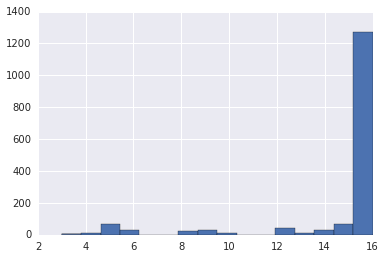

In [332]:
# distribution of where users are in the program
byperson.max()['program_week'].hist(bins=16)

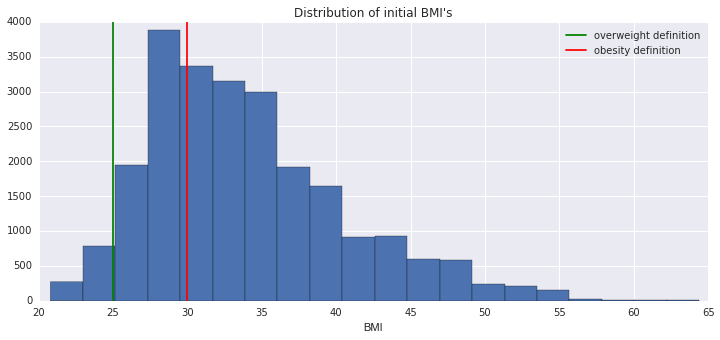

In [331]:
fig = plt.figure(figsize=(12,5))
plt.title("Distribution of initial BMI's")
plt.axvline(x=25, color='g', label='overweight definition')
plt.axvline(x=30, color='r', label='obesity definition')
plt.xlabel("BMI")
plt.legend()
df['bmi'].hist(bins=20)

In [326]:
# Let's separate those who completed the 16 week program
completed = df[~df['week16_loss'].isnull()]
byperson_completed = completed.groupby("id")

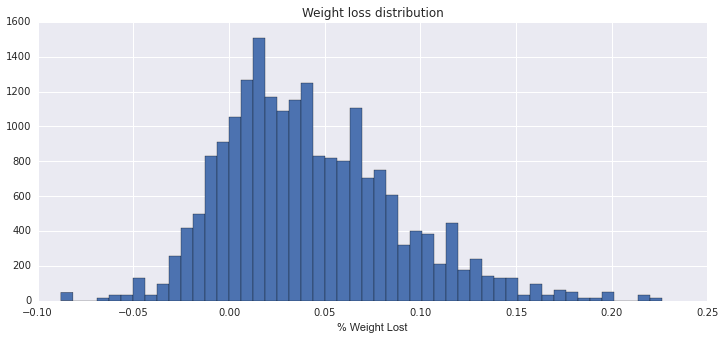

In [260]:
fig = plt.figure(figsize=(12,5))
plt.title("Weight loss distribution")
plt.xlabel("% Weight Lost")
remove_improbable_losses(df)['week16_loss'].hist(bins=50)

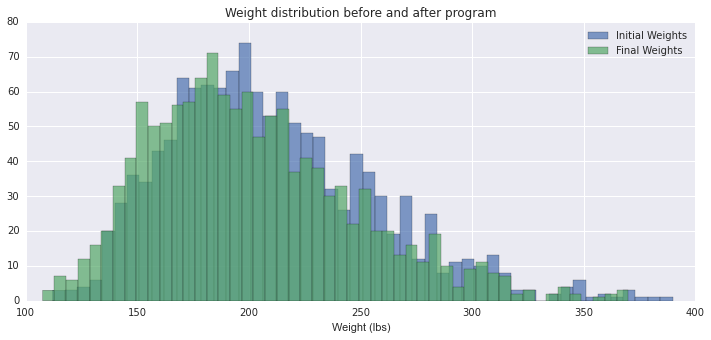

In [330]:
df['final_weight'] = df['initial_weight'] * (1 - df['week16_loss'])
fig = plt.figure(figsize=(12,5))
plt.title("Weight distribution before and after program")
plt.xlabel("Weight (lbs)")
byperson_completed.mean()['initial_weight'].hist(bins=50, label="Initial Weights", alpha=0.7)
byperson_completed.mean()['final_weight'].hist(bins=50, label="Final Weights", alpha=.7)
plt.legend()

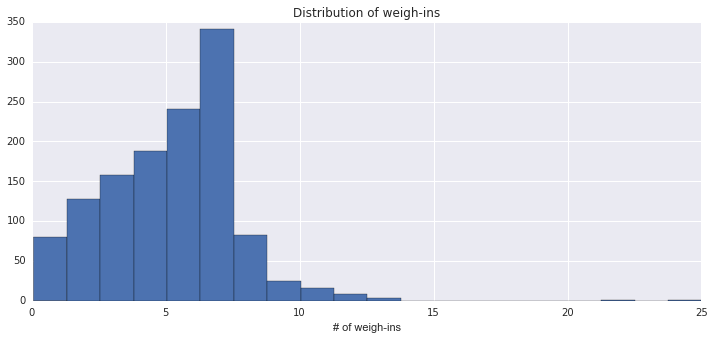

In [295]:
fig = plt.figure(figsize=(12,5))
plt.title("Distribution of weigh-ins")
plt.xlabel("# of weigh-ins")
byperson_completed.mean()['n_weigh_ins'].hist(bins=20)

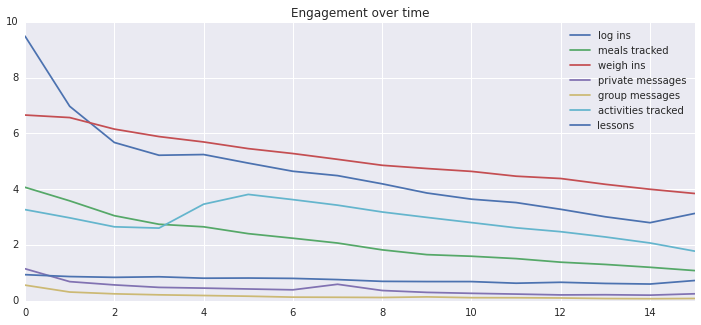

In [329]:
weekly_sum = df.groupby('program_week').mean()
fig = plt.figure(figsize=(12,5))
plt.title("Engagement over time")
plt.xlim(0,15)
plt.plot(weekly_sum['n_log_ins'], label='log ins')
plt.plot(weekly_sum['n_meals_tracked'], label='meals tracked')
plt.plot(weekly_sum['n_weigh_ins'], label='weigh ins')
plt.plot(weekly_sum['n_private_messages'], label='private messages')
plt.plot(weekly_sum['n_group_messages'], label='group messages')
plt.plot(weekly_sum['n_activities_tracked'], label='activities tracked')
plt.plot(weekly_sum['n_lessons'], label='lessons')
plt.legend()